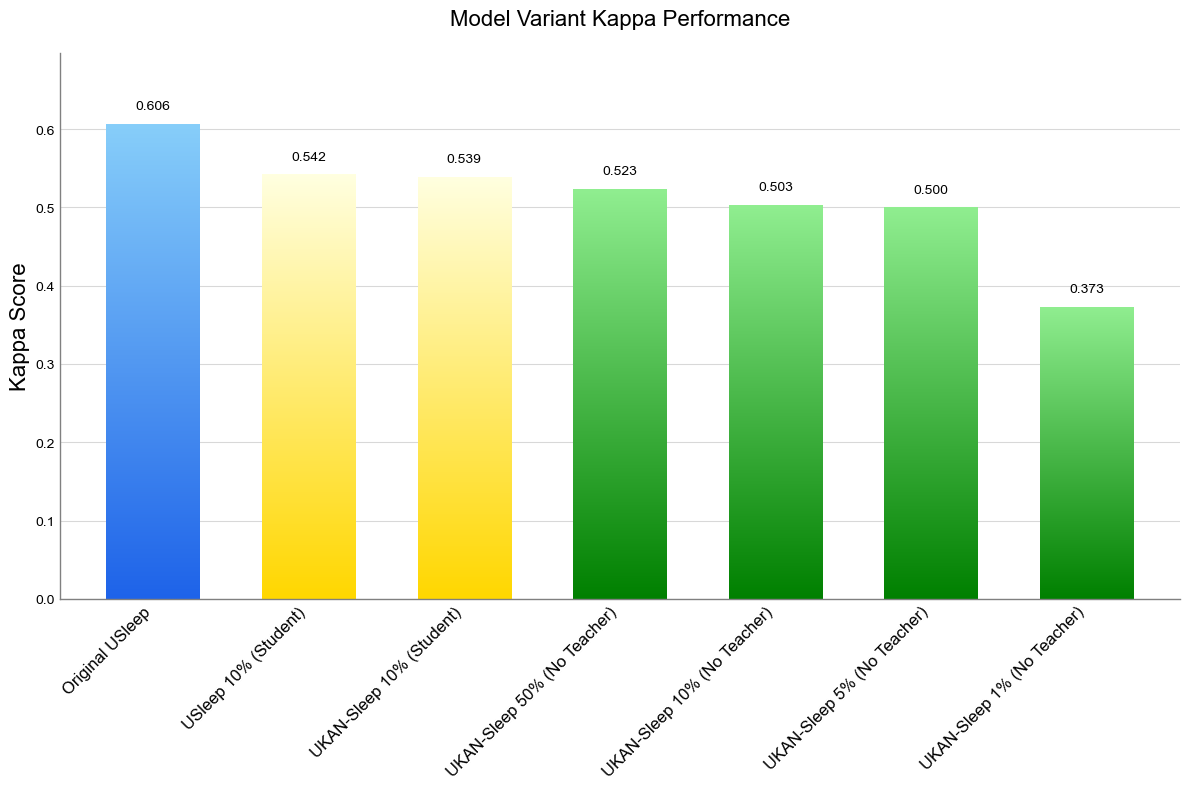

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
import matplotlib.cm as cm # Import colormaps


## MASS_c1 data

# Data Preparation (using only Kappa)
data_kappa = {
    "Variant": [
        "Original USleep",
        "UKAN-Sleep 1% (No Teacher)",
        "UKAN-Sleep 5% (No Teacher)",
        "UKAN-Sleep 50% (No Teacher)",
        "UKAN-Sleep 10% (No Teacher)",
        "UKAN-Sleep 10% (Student)",
        "USleep 10% (Student)",
    ],
    "Kappa": [0.6064, 0.3732, 0.4999, 0.5232, 0.5032, 0.5394,0.5423],
}
df_kappa = pd.DataFrame(data_kappa)

# --- Correct the typo in the DataFrame ---
df_kappa['Variant'] = df_kappa['Variant'].str.replace(
    "UKAN-Sleep 50% (No Teacher)%", "UKAN-Sleep 50% (No Teacher)", regex=False
)

# --- Sort DataFrame by Kappa Score (Descending) ---
# Changed ascending=True to ascending=False
df_kappa = df_kappa.sort_values("Kappa", ascending=False).reset_index(drop=True)

# --- Define Color Palettes ---
# Define the base colors for each category
color_original = ["#1E63E9", "#87CEFA"]      # Blue gradient (Original USleep)
color_student = ["#FFD700", "#FFFFE0"]       # Yellow gradient (Gold to Light Yellow)
color_no_teacher = ["#008000", "#90EE90"]    # Green gradient (Green to Light Green)
color_default = ["#808080", "#D3D3D3"]       # Default grey for unexpected cases

# --- Plotting Setup ---
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

n_variants = len(df_kappa)
# Check if n_variants is zero (shouldn't happen here unless input data is empty)
if n_variants == 0:
    print("Error: No data to plot.")
    plt.show()
    exit() # Or raise an error

# Index now corresponds to the sorted order (0 to n_variants-1)
index = np.arange(n_variants)
bar_width = 0.6

# Create the gradient array (vertically oriented)
gradient = np.linspace(0.0, 1.0, 256).reshape(-1, 1)

# --- Plotting Bars with Conditional Gradients (in sorted order) ---
for i, row in df_kappa.iterrows(): # Iterate through the SORTED dataframe
    # Ensure row["Variant"] is a valid string key
    if pd.isna(row["Variant"]):
        print(f"Skipping row {i} due to NaN Variant.")
        continue # Skip rows with NaN variants if any slipped through

    variant_name = str(row["Variant"]) # Explicitly convert to string
    kappa_value = row["Kappa"]
    x_pos = index[i] # Position based on the sorted index

    # Define bar boundaries
    left = x_pos - bar_width / 2
    right = x_pos + bar_width / 2
    bottom = 0
    top = kappa_value

    # --- Determine colors based on variant name ---
    if variant_name == "Original USleep":
        current_colors = color_original
    elif "(Student)" in variant_name:
        current_colors = color_student
    elif "(No Teacher)" in variant_name:
        current_colors = color_no_teacher
    else:
        print(f"Warning: Variant '{variant_name}' did not match expected patterns. Using default color.")
        current_colors = color_default # Fallback

    # Define the gradient colormap for this specific bar
    cmap_name = f"custom_gradient_{i}" # Use index for unique cmap name
    try:
        current_gradient_cmap = LinearSegmentedColormap.from_list(
            cmap_name, current_colors, N=256
        )
    except Exception as e:
        print(f"Error creating colormap for {variant_name} with colors {current_colors}: {e}")
        continue # Skip this bar if colormap fails

    # Create a rectangle patch for clipping the gradient
    rect = Rectangle((left, bottom), bar_width, top, transform=ax.transData)

    # Use imshow to draw the gradient within the bar's extent
    im = ax.imshow(
        gradient, aspect="auto", extent=[left, right, bottom, top],
        cmap=current_gradient_cmap, origin="lower", interpolation="bilinear",
        zorder=2 # Ensure gradient is drawn above grid lines
    )
    im.set_clip_path(rect) # Clip the gradient to the bar shape

    # Add value label on top
    label_text = f"{kappa_value:.3f}"
    ax.text(
        x_pos, top + 0.015, label_text, ha="center", va="bottom",
        fontsize=10, color="black", fontweight="medium",
    )

# --- Styling ---
ax.set_ylabel("Kappa Score", color="black", fontsize=16)
# Updated title to reflect sorting
ax.set_title("Model Variant Kappa Performance", color="black", fontsize=16, pad=20) # Updated title
ax.set_xticks(index)
# Use the actual variant names from the SORTED DataFrame for labels
ax.set_xticklabels(df_kappa["Variant"], rotation=45, ha="right", color="black", fontsize=12)
ax.tick_params(axis="x", colors="black", length=0)
ax.tick_params(axis="y", colors="black")
ax.grid(axis="y", linestyle="-", alpha=0.3, color="grey", zorder=1) # Ensure grid is behind bars
ax.grid(axis="x", linestyle="", alpha=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")
# Handle case where df_kappa might be empty after filtering
if not df_kappa.empty:
    # Adjust ylim slightly based on the actual min/max after sorting if needed
    # Or keep it based on max like before
    ax.set_ylim(0, df_kappa["Kappa"].max() * 1.15)
else:
    ax.set_ylim(0, 1) # Default ylim if no data

ax.set_xlim(-bar_width, n_variants - 1 + bar_width) # Adjusted xlim slightly
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


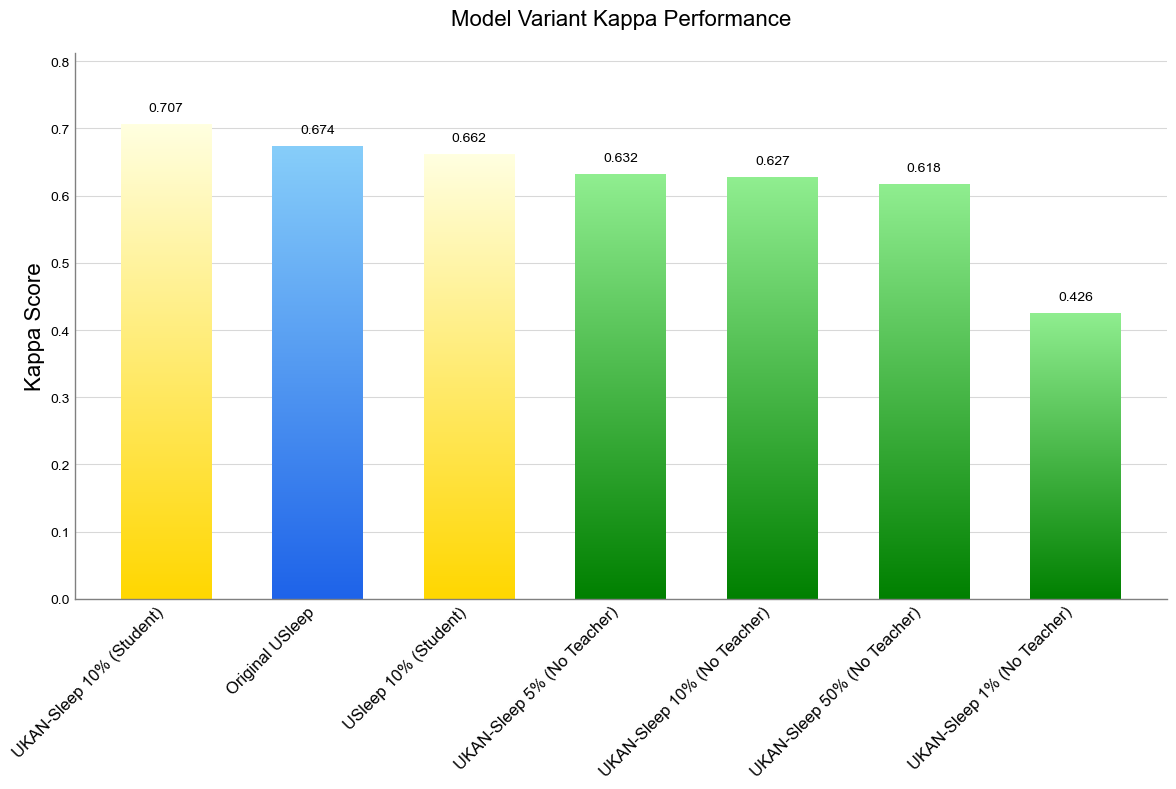

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
import matplotlib.cm as cm # Import colormaps


## IS ROC DATA
# Data Preparation (using only Kappa)
data_kappa = {
    "Variant": [
        "Original USleep",
        "UKAN-Sleep 1% (No Teacher)",
        "UKAN-Sleep 5% (No Teacher)",
        "UKAN-Sleep 50% (No Teacher)",
        "UKAN-Sleep 10% (No Teacher)",
        "UKAN-Sleep 10% (Student)",
        "USleep 10% (Student)",
    ],
    "Kappa": [0.6744, 0.4256, 0.6318, 0.6176, 0.6273, 0.7065,0.6620],
}
df_kappa = pd.DataFrame(data_kappa)

# --- Correct the typo in the DataFrame ---
df_kappa['Variant'] = df_kappa['Variant'].str.replace(
    "UKAN-Sleep 50% (No Teacher)%", "UKAN-Sleep 50% (No Teacher)", regex=False
)

# --- Sort DataFrame by Kappa Score (Descending) ---
# Changed ascending=True to ascending=False
df_kappa = df_kappa.sort_values("Kappa", ascending=False).reset_index(drop=True)

# --- Define Color Palettes ---
# Define the base colors for each category
color_original = ["#1E63E9", "#87CEFA"]      # Blue gradient (Original USleep)
color_student = ["#FFD700", "#FFFFE0"]       # Yellow gradient (Gold to Light Yellow)
color_no_teacher = ["#008000", "#90EE90"]    # Green gradient (Green to Light Green)
color_default = ["#808080", "#D3D3D3"]       # Default grey for unexpected cases

# --- Plotting Setup ---
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

n_variants = len(df_kappa)
# Check if n_variants is zero (shouldn't happen here unless input data is empty)
if n_variants == 0:
    print("Error: No data to plot.")
    plt.show()
    exit() # Or raise an error

# Index now corresponds to the sorted order (0 to n_variants-1)
index = np.arange(n_variants)
bar_width = 0.6

# Create the gradient array (vertically oriented)
gradient = np.linspace(0.0, 1.0, 256).reshape(-1, 1)

# --- Plotting Bars with Conditional Gradients (in sorted order) ---
for i, row in df_kappa.iterrows(): # Iterate through the SORTED dataframe
    # Ensure row["Variant"] is a valid string key
    if pd.isna(row["Variant"]):
        print(f"Skipping row {i} due to NaN Variant.")
        continue # Skip rows with NaN variants if any slipped through

    variant_name = str(row["Variant"]) # Explicitly convert to string
    kappa_value = row["Kappa"]
    x_pos = index[i] # Position based on the sorted index

    # Define bar boundaries
    left = x_pos - bar_width / 2
    right = x_pos + bar_width / 2
    bottom = 0
    top = kappa_value

    # --- Determine colors based on variant name ---
    if variant_name == "Original USleep":
        current_colors = color_original
    elif "(Student)" in variant_name:
        current_colors = color_student
    elif "(No Teacher)" in variant_name:
        current_colors = color_no_teacher
    else:
        print(f"Warning: Variant '{variant_name}' did not match expected patterns. Using default color.")
        current_colors = color_default # Fallback

    # Define the gradient colormap for this specific bar
    cmap_name = f"custom_gradient_{i}" # Use index for unique cmap name
    try:
        current_gradient_cmap = LinearSegmentedColormap.from_list(
            cmap_name, current_colors, N=256
        )
    except Exception as e:
        print(f"Error creating colormap for {variant_name} with colors {current_colors}: {e}")
        continue # Skip this bar if colormap fails

    # Create a rectangle patch for clipping the gradient
    rect = Rectangle((left, bottom), bar_width, top, transform=ax.transData)

    # Use imshow to draw the gradient within the bar's extent
    im = ax.imshow(
        gradient, aspect="auto", extent=[left, right, bottom, top],
        cmap=current_gradient_cmap, origin="lower", interpolation="bilinear",
        zorder=2 # Ensure gradient is drawn above grid lines
    )
    im.set_clip_path(rect) # Clip the gradient to the bar shape

    # Add value label on top
    label_text = f"{kappa_value:.3f}"
    ax.text(
        x_pos, top + 0.015, label_text, ha="center", va="bottom",
        fontsize=10, color="black", fontweight="medium",
    )

# --- Styling ---
ax.set_ylabel("Kappa Score", color="black", fontsize=16)
# Updated title to reflect sorting
ax.set_title("Model Variant Kappa Performance", color="black", fontsize=16, pad=20) # Updated title
ax.set_xticks(index)
# Use the actual variant names from the SORTED DataFrame for labels
ax.set_xticklabels(df_kappa["Variant"], rotation=45, ha="right", color="black", fontsize=12)
ax.tick_params(axis="x", colors="black", length=0)
ax.tick_params(axis="y", colors="black")
ax.grid(axis="y", linestyle="-", alpha=0.3, color="grey", zorder=1) # Ensure grid is behind bars
ax.grid(axis="x", linestyle="", alpha=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")
# Handle case where df_kappa might be empty after filtering
if not df_kappa.empty:
    # Adjust ylim slightly based on the actual min/max after sorting if needed
    # Or keep it based on max like before
    ax.set_ylim(0, df_kappa["Kappa"].max() * 1.15)
else:
    ax.set_ylim(0, 1) # Default ylim if no data

ax.set_xlim(-bar_width, n_variants - 1 + bar_width) # Adjusted xlim slightly
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


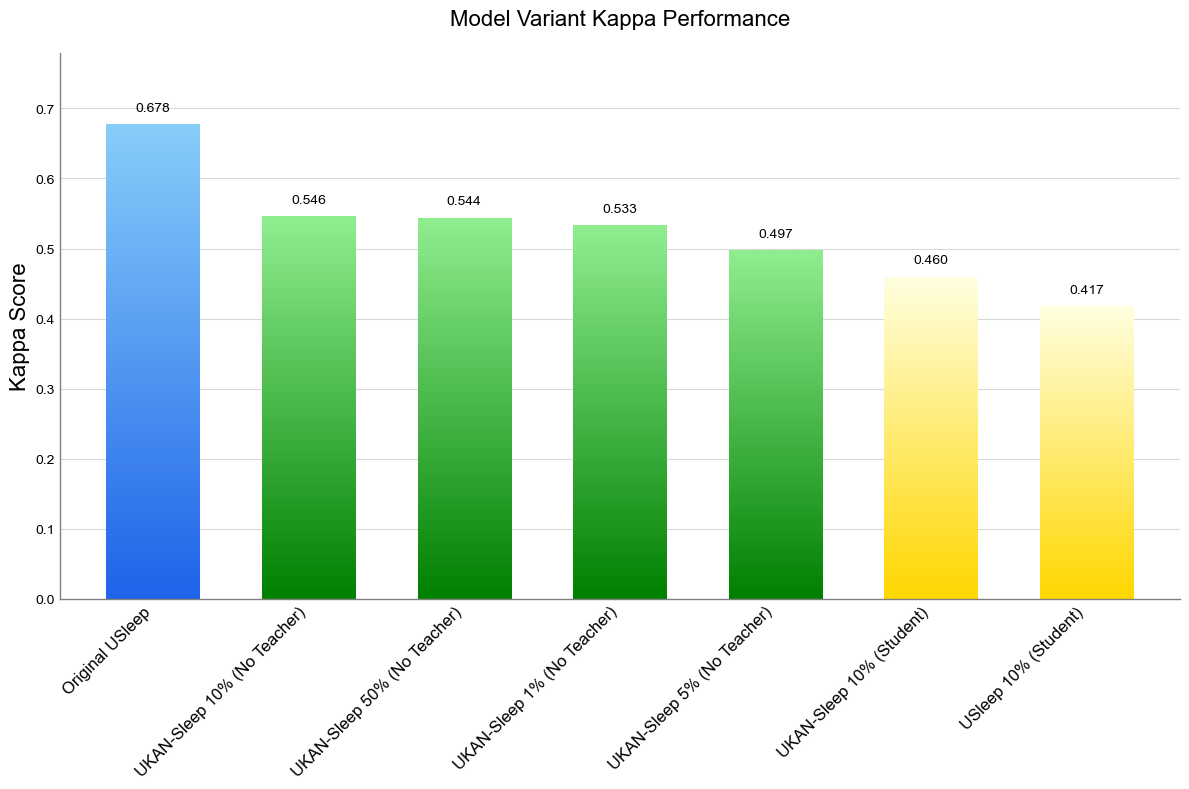

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
import matplotlib.cm as cm # Import colormaps


## IS ROC DATA
# Data Preparation (using only Kappa)
data_kappa = {
    "Variant": [
        "Original USleep",
        "UKAN-Sleep 1% (No Teacher)",
        "UKAN-Sleep 5% (No Teacher)",
        "UKAN-Sleep 50% (No Teacher)",
        "UKAN-Sleep 10% (No Teacher)",
        "UKAN-Sleep 10% (Student)",
        "USleep 10% (Student)",
    ],
    "Kappa": [0.6776, 0.5333, 0.4975, 0.5439, 0.5462, 0.4595, 0.4175],
}
df_kappa = pd.DataFrame(data_kappa)

# --- Correct the typo in the DataFrame ---
df_kappa['Variant'] = df_kappa['Variant'].str.replace(
    "UKAN-Sleep 50% (No Teacher)%", "UKAN-Sleep 50% (No Teacher)", regex=False
)

# --- Sort DataFrame by Kappa Score (Descending) ---
# Changed ascending=True to ascending=False
df_kappa = df_kappa.sort_values("Kappa", ascending=False).reset_index(drop=True)

# --- Define Color Palettes ---
# Define the base colors for each category
color_original = ["#1E63E9", "#87CEFA"]      # Blue gradient (Original USleep)
color_student = ["#FFD700", "#FFFFE0"]       # Yellow gradient (Gold to Light Yellow)
color_no_teacher = ["#008000", "#90EE90"]    # Green gradient (Green to Light Green)
color_default = ["#808080", "#D3D3D3"]       # Default grey for unexpected cases

# --- Plotting Setup ---
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

n_variants = len(df_kappa)
# Check if n_variants is zero (shouldn't happen here unless input data is empty)
if n_variants == 0:
    print("Error: No data to plot.")
    plt.show()
    exit() # Or raise an error

# Index now corresponds to the sorted order (0 to n_variants-1)
index = np.arange(n_variants)
bar_width = 0.6

# Create the gradient array (vertically oriented)
gradient = np.linspace(0.0, 1.0, 256).reshape(-1, 1)

# --- Plotting Bars with Conditional Gradients (in sorted order) ---
for i, row in df_kappa.iterrows(): # Iterate through the SORTED dataframe
    # Ensure row["Variant"] is a valid string key
    if pd.isna(row["Variant"]):
        print(f"Skipping row {i} due to NaN Variant.")
        continue # Skip rows with NaN variants if any slipped through

    variant_name = str(row["Variant"]) # Explicitly convert to string
    kappa_value = row["Kappa"]
    x_pos = index[i] # Position based on the sorted index

    # Define bar boundaries
    left = x_pos - bar_width / 2
    right = x_pos + bar_width / 2
    bottom = 0
    top = kappa_value

    # --- Determine colors based on variant name ---
    if variant_name == "Original USleep":
        current_colors = color_original
    elif "(Student)" in variant_name:
        current_colors = color_student
    elif "(No Teacher)" in variant_name:
        current_colors = color_no_teacher
    else:
        print(f"Warning: Variant '{variant_name}' did not match expected patterns. Using default color.")
        current_colors = color_default # Fallback

    # Define the gradient colormap for this specific bar
    cmap_name = f"custom_gradient_{i}" # Use index for unique cmap name
    try:
        current_gradient_cmap = LinearSegmentedColormap.from_list(
            cmap_name, current_colors, N=256
        )
    except Exception as e:
        print(f"Error creating colormap for {variant_name} with colors {current_colors}: {e}")
        continue # Skip this bar if colormap fails

    # Create a rectangle patch for clipping the gradient
    rect = Rectangle((left, bottom), bar_width, top, transform=ax.transData)

    # Use imshow to draw the gradient within the bar's extent
    im = ax.imshow(
        gradient, aspect="auto", extent=[left, right, bottom, top],
        cmap=current_gradient_cmap, origin="lower", interpolation="bilinear",
        zorder=2 # Ensure gradient is drawn above grid lines
    )
    im.set_clip_path(rect) # Clip the gradient to the bar shape

    # Add value label on top
    label_text = f"{kappa_value:.3f}"
    ax.text(
        x_pos, top + 0.015, label_text, ha="center", va="bottom",
        fontsize=10, color="black", fontweight="medium",
    )

# --- Styling ---
ax.set_ylabel("Kappa Score", color="black", fontsize=16)
# Updated title to reflect sorting
ax.set_title("Model Variant Kappa Performance", color="black", fontsize=16, pad=20) # Updated title
ax.set_xticks(index)
# Use the actual variant names from the SORTED DataFrame for labels
ax.set_xticklabels(df_kappa["Variant"], rotation=45, ha="right", color="black", fontsize=12)
ax.tick_params(axis="x", colors="black", length=0)
ax.tick_params(axis="y", colors="black")
ax.grid(axis="y", linestyle="-", alpha=0.3, color="grey", zorder=1) # Ensure grid is behind bars
ax.grid(axis="x", linestyle="", alpha=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")
# Handle case where df_kappa might be empty after filtering
if not df_kappa.empty:
    # Adjust ylim slightly based on the actual min/max after sorting if needed
    # Or keep it based on max like before
    ax.set_ylim(0, df_kappa["Kappa"].max() * 1.15)
else:
    ax.set_ylim(0, 1) # Default ylim if no data

ax.set_xlim(-bar_width, n_variants - 1 + bar_width) # Adjusted xlim slightly
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


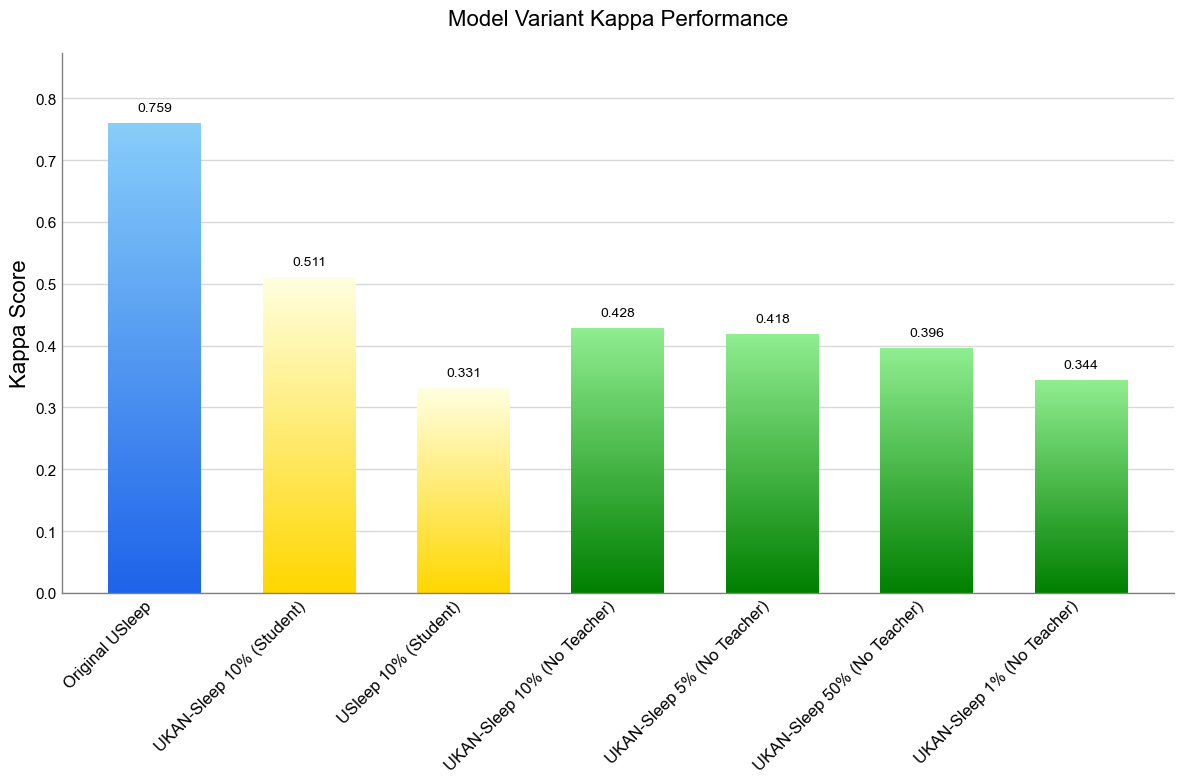

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
import matplotlib.cm as cm # Import colormaps

# Data Preparation (using only Kappa)
data_kappa = {
    "Variant": [
        "Original USleep", "UKAN-Sleep 1% (No Teacher)", "UKAN-Sleep 5% (No Teacher)",
        "UKAN-Sleep 50% (No Teacher)%", # Typo here
        "UKAN-Sleep 10% (No Teacher)",
        "UKAN-Sleep 10% (Student)", "USleep 10% (Student)",
    ],
    "Kappa": [
        0.7595, 0.3438, 0.4183, 0.3959, 0.4283,
        0.5108, 0.3310,
    ],
}
df_kappa = pd.DataFrame(data_kappa)

# --- Correct the typo in the DataFrame ---
df_kappa['Variant'] = df_kappa['Variant'].str.replace(
    "UKAN-Sleep 50% (No Teacher)%", "UKAN-Sleep 50% (No Teacher)", regex=False
)

# --- Define Custom Order using EXACT names from the DataFrame ---
# This list MUST contain the actual names present in df_kappa['Variant']
# Adjust the order as needed based on the available variants.
custom_order = [
    "Original USleep",
    "UKAN-Sleep 10% (Student)",
    "USleep 10% (Student)", # Group student models together if desired
    "UKAN-Sleep 10% (No Teacher)",
    "UKAN-Sleep 5% (No Teacher)",
    "UKAN-Sleep 50% (No Teacher)",
    "UKAN-Sleep 1% (No Teacher)",
]
# Filter custom_order to only include variants actually in the dataframe
available_variants = df_kappa['Variant'].unique()
custom_order = [v for v in custom_order if v in available_variants]

# Reorder the DataFrame
df_kappa['Variant'] = pd.Categorical(
    df_kappa['Variant'], categories=custom_order, ordered=True
)
# Drop rows where Variant became NaN because it wasn't in custom_order
df_kappa = df_kappa.dropna(subset=['Variant'])
df_kappa = df_kappa.sort_values('Variant').reset_index(drop=True)

# --- Define Color Palettes ---
# Define the base colors for each category
color_original = ["#1E63E9", "#87CEFA"]      # Blue gradient (Original USleep)
color_student = ["#FFD700", "#FFFFE0"]       # Yellow gradient (Gold to Light Yellow)
color_no_teacher = ["#008000", "#90EE90"]    # Green gradient (Green to Light Green)
color_default = ["#808080", "#D3D3D3"]       # Default grey for unexpected cases

# --- Plotting Setup ---
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

n_variants = len(df_kappa)
# Check if n_variants is zero after filtering/dropping NaNs
if n_variants == 0:
    print("Error: No matching variants found between data and custom_order.")
    plt.show()
    exit() # Or raise an error

index = np.arange(n_variants) # Use index based on the custom order
bar_width = 0.6

# Create the gradient array (vertically oriented)
gradient = np.linspace(0.0, 1.0, 256).reshape(-1, 1)

# --- Plotting Bars with Conditional Gradients ---
for i, row in df_kappa.iterrows(): # Iterate through the reordered dataframe
    # Ensure row["Variant"] is a valid string key
    if pd.isna(row["Variant"]):
        print(f"Skipping row {i} due to NaN Variant.")
        continue # Skip rows with NaN variants if any slipped through

    variant_name = str(row["Variant"]) # Explicitly convert to string
    kappa_value = row["Kappa"]
    x_pos = index[i] # Position based on custom order index

    # Define bar boundaries
    left = x_pos - bar_width / 2
    right = x_pos + bar_width / 2
    bottom = 0
    top = kappa_value

    # --- Determine colors based on variant name ---
    if variant_name == "Original USleep":
        current_colors = color_original
    elif "(Student)" in variant_name:
        current_colors = color_student
    elif "(No Teacher)" in variant_name:
        current_colors = color_no_teacher
    else:
        print(f"Warning: Variant '{variant_name}' did not match expected patterns. Using default color.")
        current_colors = color_default # Fallback

    # Define the gradient colormap for this specific bar
    cmap_name = f"custom_gradient_{i}" # Use index for unique cmap name
    try:
        current_gradient_cmap = LinearSegmentedColormap.from_list(
            cmap_name, current_colors, N=256
        )
    except Exception as e:
        print(f"Error creating colormap for {variant_name} with colors {current_colors}: {e}")
        continue # Skip this bar if colormap fails

    # Create a rectangle patch for clipping the gradient
    rect = Rectangle((left, bottom), bar_width, top, transform=ax.transData)

    # Use imshow to draw the gradient within the bar's extent
    im = ax.imshow(
        gradient, aspect="auto", extent=[left, right, bottom, top],
        cmap=current_gradient_cmap, origin="lower", interpolation="bilinear",
        zorder=2 # Ensure gradient is drawn above grid lines
    )
    im.set_clip_path(rect) # Clip the gradient to the bar shape

    # Add value label on top
    label_text = f"{kappa_value:.3f}"
    ax.text(
        x_pos, top + 0.015, label_text, ha="center", va="bottom",
        fontsize=10, color="black", fontweight="medium",
    )

# --- Styling ---
ax.set_ylabel("Kappa Score", color="black", fontsize=16)
ax.set_title("Model Variant Kappa Performance", color="black", fontsize=16, pad=20)
ax.set_xticks(index)
# Use the actual variant names from the sorted DataFrame for labels
ax.set_xticklabels(df_kappa["Variant"], rotation=45, ha="right", color="black", fontsize=12)
ax.tick_params(axis="x", colors="black", length=0)
ax.tick_params(axis="y", colors="black")
ax.grid(axis="y", linestyle="-", alpha=0.3, color="grey", zorder=1) # Ensure grid is behind bars
ax.grid(axis="x", linestyle="", alpha=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")
# Handle case where df_kappa might be empty after filtering
if not df_kappa.empty:
    ax.set_ylim(0, df_kappa["Kappa"].max() * 1.15)
else:
    ax.set_ylim(0, 1) # Default ylim if no data

ax.set_xlim(-bar_width, n_variants - 1 + bar_width) # Adjusted xlim slightly
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


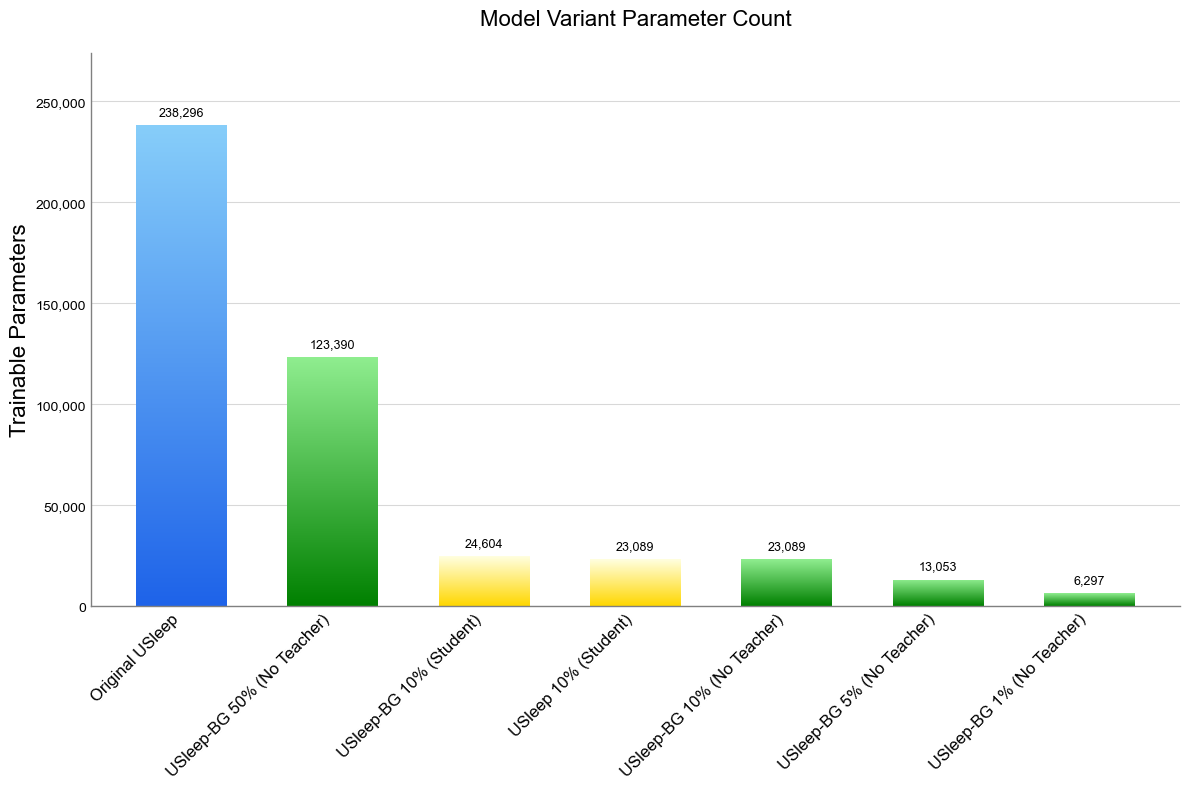

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
import matplotlib.cm as cm # Import colormaps
import matplotlib.ticker as mticker # For formatting y-axis labels

# --- Define the mapping from old placeholder names to correct names ---
# Adjust this mapping if my interpretation is incorrect
name_mapping = {
    "original_usleep": "Original USleep",
    "1%": "USleep-BG 1% (No Teacher)",
    "5%": "USleep-BG 5% (No Teacher)",
    "50%": "USleep-BG 50% (No Teacher)", # Will handle typo later if needed
    "gram_sleep_train": "USleep 10% (Student)",
    "no_teach_gram_train": "USleep-BG 10% (No Teacher)",
    "normal_usleep_student_train": "USleep-BG 10% (Student)",
    # "train_script_UKAN": was removed
}

# Data Preparation using OLD names first for structure
data_params_old_names = {
    "Variant_Old": [
        "original_usleep", "1%", "5%", "50%", "gram_sleep_train",
        "no_teach_gram_train", "normal_usleep_student_train",
    ],
    "Trainable Parameters": [
        "238,296", "6,297", "13,053", "123,390", "23,089",
        "23,089", "24,604",
    ],
}
df_params = pd.DataFrame(data_params_old_names)

# --- Apply the name mapping to create the correct 'Variant' column ---
df_params["Variant"] = df_params["Variant_Old"].map(name_mapping)

# --- Correct the typo in the new Variant names (if necessary) ---
# Example: If the 50% variant name had a typo like in the Kappa data
# df_params['Variant'] = df_params['Variant'].str.replace(
#     "USleep-BG 50% (No Teacher)%", "USleep-BG 50% (No Teacher)", regex=False
# )

# Convert parameter strings to integers
df_params["Params_Int"] = df_params["Trainable Parameters"].str.replace(",", "").astype(int)

# --- Sort Data ---
# Sort by Parameter count DESCENDING
df_params = df_params.sort_values("Params_Int", ascending=False).reset_index(drop=True)

# --- Define Color Palettes (Same as Kappa Plot) ---
color_original = ["#1E63E9", "#87CEFA"]      # Blue gradient (Original USleep)
color_student = ["#FFD700", "#FFFFE0"]       # Yellow gradient (Gold to Light Yellow)
color_no_teacher = ["#008000", "#90EE90"]    # Green gradient (Green to Light Green)
color_default = ["#808080", "#D3D3D3"]       # Default grey for unexpected cases


# --- Plotting Setup ---
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12, 8)) # Increased height for labels
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

n_variants = len(df_params)
index = np.arange(n_variants) # Use index based on sorted order
bar_width = 0.6

# Create the gradient array (vertically oriented)
gradient = np.linspace(0.0, 1.0, 256).reshape(-1, 1)

# --- Plotting Bars with Conditional Gradients ---
for i, row in df_params.iterrows(): # Iterate through the sorted dataframe
    variant_name = row["Variant"] # Get CORRECT variant name for color lookup
    param_value = row["Params_Int"]
    param_label = row["Trainable Parameters"] # Original string label with comma
    x_pos = index[i] # Position based on sorted index

    # Define bar boundaries
    left = x_pos - bar_width / 2
    right = x_pos + bar_width / 2
    bottom = 0
    top = param_value

    # --- Determine colors based on variant name (Same logic as Kappa plot) ---
    if variant_name == "Original USleep":
        current_colors = color_original
    elif "(Student)" in variant_name:
        current_colors = color_student
    elif "(No Teacher)" in variant_name:
        current_colors = color_no_teacher
    else:
        print(f"Warning: Variant '{variant_name}' did not match expected patterns. Using default color.")
        current_colors = color_default # Fallback

    # Define the gradient colormap for this specific bar
    cmap_name = f"custom_gradient_{i}" # Use index for unique name
    try:
        current_gradient_cmap = LinearSegmentedColormap.from_list(
            cmap_name, current_colors, N=256
        )
    except Exception as e:
        print(f"Error creating colormap for {variant_name} with colors {current_colors}: {e}")
        continue # Skip this bar if colormap fails

    # Create a rectangle patch for clipping the gradient
    rect = Rectangle((left, bottom), bar_width, top, transform=ax.transData)

    # Use imshow to draw the gradient within the bar's extent
    im = ax.imshow(
        gradient, aspect="auto", extent=[left, right, bottom, top],
        cmap=current_gradient_cmap, origin="lower", interpolation="bilinear",
        zorder=2 # Ensure gradient is above grid
    )
    im.set_clip_path(rect) # Clip the gradient

    # Add value label on top (using original string with comma)
    vertical_offset = df_params["Params_Int"].max() * 0.015
    ax.text(
        x_pos, top + vertical_offset, f"{param_label}",
        ha="center", va="bottom", fontsize=9, color="black", fontweight="medium",
    )

# --- Styling ---
ax.set_ylabel("Trainable Parameters", color="black", fontsize=16)
ax.set_title("Model Variant Parameter Count", color="black", fontsize=16, pad=20)
ax.set_xticks(index)
# Use the CORRECT sorted variant names for labels
ax.set_xticklabels(df_params["Variant"], rotation=45, ha="right", color="black", fontsize=12)
ax.tick_params(axis="x", colors="black", length=0)
ax.tick_params(axis="y", colors="black")
formatter = mticker.FuncFormatter(lambda x, p: format(int(x), ',')) # Comma formatter
ax.yaxis.set_major_formatter(formatter)
ax.grid(axis="y", linestyle="-", alpha=0.3, color="grey", zorder=1) # Ensure grid is behind bars
ax.grid(axis="x", linestyle="", alpha=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")
ax.set_ylim(0, df_params["Params_Int"].max() * 1.15)
ax.set_xlim(-bar_width, n_variants - 1 + bar_width)
plt.tight_layout() # Adjust layout
plt.show()


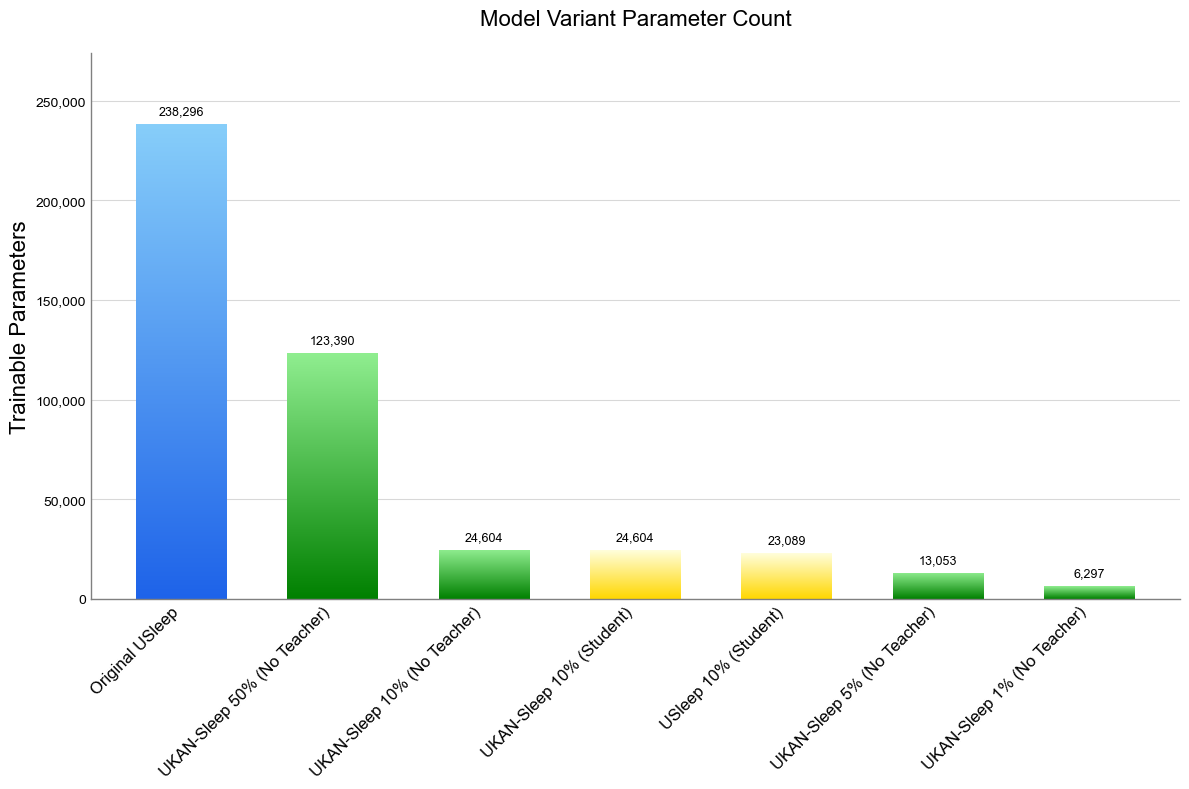

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
import matplotlib.ticker as mticker # For formatting y-axis labels

# ------------ Use NEW variant names as requested ---------------
variants = [
    "Original USleep",
    "UKAN-Sleep 1% (No Teacher)",
    "UKAN-Sleep 5% (No Teacher)",
    "UKAN-Sleep 50% (No Teacher)",
    "UKAN-Sleep 10% (No Teacher)",
    "UKAN-Sleep 10% (Student)",
    "USleep 10% (Student)",
]

param_counts = [
    "238,296",
    "6,297",
    "13,053",
    "123,390",
    "24,604",
    "24,604",
    "23,089",
]

# Create the DataFrame
df_params = pd.DataFrame({
    "Variant": variants,
    "Trainable Parameters": param_counts,
})

# Convert parameter strings to integers
df_params["Params_Int"] = df_params["Trainable Parameters"].str.replace(",", "").astype(int)

# --- Sort Data ---
# Sort by Parameter count DESCENDING
df_params = df_params.sort_values("Params_Int", ascending=False).reset_index(drop=True)

# --- Define Color Palettes ---
color_original = ["#1E63E9", "#87CEFA"]      # Blue gradient (Original USleep)
color_student = ["#FFD700", "#FFFFE0"]       # Yellow gradient (Gold to Light Yellow)
color_no_teacher = ["#008000", "#90EE90"]    # Green gradient (Green to Light Green)
color_default = ["#808080", "#D3D3D3"]       # Default grey

# --- Plotting Setup ---
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

n_variants = len(df_params)
index = np.arange(n_variants)
bar_width = 0.6
gradient = np.linspace(0.0, 1.0, 256).reshape(-1, 1)

# --- Plotting Bars with Conditional Gradients ---
for i, row in df_params.iterrows():
    variant_name = row["Variant"]
    param_value = row["Params_Int"]
    param_label = row["Trainable Parameters"]
    x_pos = index[i]

    # Define bar boundaries
    left = x_pos - bar_width / 2
    right = x_pos + bar_width / 2
    bottom = 0
    top = param_value

    # --- Determine colors based on variant name ---
    # Blue for Original USleep
    if variant_name == "Original USleep":
        current_colors = color_original
    # Yellow for (Student) variants
    elif "(Student)" in variant_name:
        current_colors = color_student
    # Green for (No Teacher) variants
    elif "(No Teacher)" in variant_name:
        current_colors = color_no_teacher
    else:
        print(f"Warning: Variant '{variant_name}' did not match expected patterns. Using default color.")
        current_colors = color_default # Fallback

    # Define the gradient colormap for this specific bar
    cmap_name = f"custom_gradient_{i}"
    try:
        current_gradient_cmap = LinearSegmentedColormap.from_list(
            cmap_name, current_colors, N=256
        )
    except Exception as e:
        print(f"Error creating colormap for {variant_name} with colors {current_colors}: {e}")
        continue

    # Create a rectangle patch for clipping the gradient
    rect = Rectangle((left, bottom), bar_width, top, transform=ax.transData)

    # Use imshow to draw the gradient within the bar's extent
    im = ax.imshow(
        gradient, aspect="auto", extent=[left, right, bottom, top],
        cmap=current_gradient_cmap, origin="lower", interpolation="bilinear",
        zorder=2
    )
    im.set_clip_path(rect)

    # Add value label on top
    vertical_offset = df_params["Params_Int"].max() * 0.015
    ax.text(
        x_pos, top + vertical_offset, f"{param_label}",
        ha="center", va="bottom", fontsize=9, color="black", fontweight="medium",
    )

# --- Styling ---
ax.set_ylabel("Trainable Parameters", color="black", fontsize=16)
ax.set_title("Model Variant Parameter Count", color="black", fontsize=16, pad=20)
ax.set_xticks(index)
ax.set_xticklabels(df_params["Variant"], rotation=45, ha="right", color="black", fontsize=12)
ax.tick_params(axis="x", colors="black", length=0)
ax.tick_params(axis="y", colors="black")
formatter = mticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.grid(axis="y", linestyle="-", alpha=0.3, color="grey", zorder=1)
ax.grid(axis="x", linestyle="", alpha=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")
ax.set_ylim(0, df_params["Params_Int"].max() * 1.15)
ax.set_xlim(-bar_width, n_variants - 1 + bar_width)
plt.tight_layout()
plt.show()


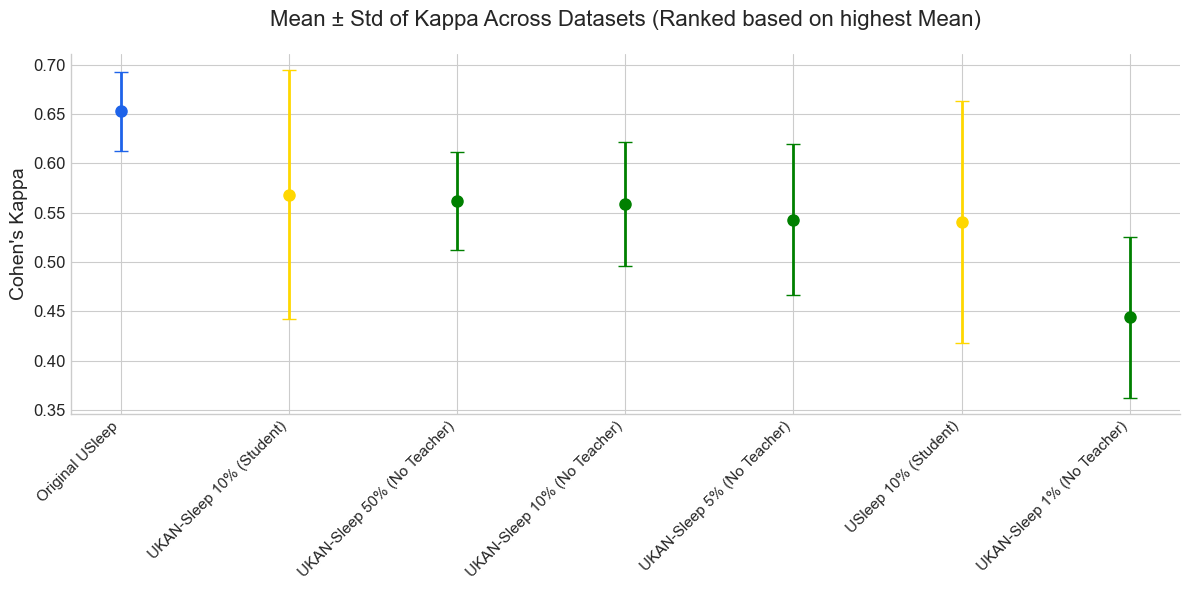

Original USleep: 0.6528 ± 0.0402
UKAN-Sleep 10% (Student): 0.5685 ± 0.1260
UKAN-Sleep 50% (No Teacher): 0.5616 ± 0.0496
UKAN-Sleep 10% (No Teacher): 0.5589 ± 0.0630
UKAN-Sleep 5% (No Teacher): 0.5431 ± 0.0769
USleep 10% (Student): 0.5406 ± 0.1223
UKAN-Sleep 1% (No Teacher): 0.4440 ± 0.0816


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Define variants and Kappa values across three datasets
variants = [
    "Original USleep",
    "UKAN-Sleep 1% (No Teacher)",
    "UKAN-Sleep 5% (No Teacher)",
    "UKAN-Sleep 50% (No Teacher)",
    "UKAN-Sleep 10% (No Teacher)",
    "UKAN-Sleep 10% (Student)",
    "USleep 10% (Student)",
]

# Kappa values
kappa_isroc = [0.6744, 0.4256, 0.6318, 0.6176, 0.6273, 0.7065, 0.6620]
kappa_mass_c1 = [0.6064, 0.3732, 0.4999, 0.5232, 0.5032, 0.5394, 0.5423]
kappa_usleep = [0.6776, 0.5333, 0.4975, 0.5439, 0.5462, 0.4595, 0.4175]

# Convert to DataFrame
df = pd.DataFrame({
    "Variant": variants,
    "ISROC": kappa_isroc,
    "MASS_C1": kappa_mass_c1,
    "USleep": kappa_usleep
})

# Compute mean and std
df["Mean_Kappa"] = df[["ISROC", "MASS_C1", "USleep"]].mean(axis=1)
df["Std_Kappa"] = df[["ISROC", "MASS_C1", "USleep"]].std(axis=1)

# Sort by mean kappa descending
df = df.sort_values("Mean_Kappa", ascending=False).reset_index(drop=True)

# Assign colors
def get_color(variant):
    if "Original USleep" in variant:
        return "#1E63E9"  # Blue
    elif "(Student)" in variant:
        return "#FFD700"  # Gold
    elif "(No Teacher)" in variant:
        return "#008000"  # Green
    return "#808080"      # Grey fallback

df["Color"] = df["Variant"].apply(get_color)

# Plot
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

x = np.arange(len(df))
y = df["Mean_Kappa"]
yerr = df["Std_Kappa"]

# Draw dots with error bars, colored by model type
for i in range(len(df)):
    ax.errorbar(
        x[i], y[i], yerr=yerr[i], fmt='o', 
        ecolor=df.loc[i, "Color"], color=df.loc[i, "Color"],
        elinewidth=2, capsize=5, markersize=8
    )

# Styling
ax.set_xticks(x)
ax.set_xticklabels(df["Variant"], rotation=45, ha="right", fontsize=11)
ax.set_ylabel("Cohen's Kappa", fontsize=14)
ax.set_title("Mean ± Std of Kappa Across Datasets (Ranked based on highest Mean)", fontsize=16, pad=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", length=0)

plt.tight_layout()
plt.show()
for i, row in df.iterrows():
    print(f"{row['Variant']}: {row['Mean_Kappa']:.4f} ± {row['Std_Kappa']:.4f}")


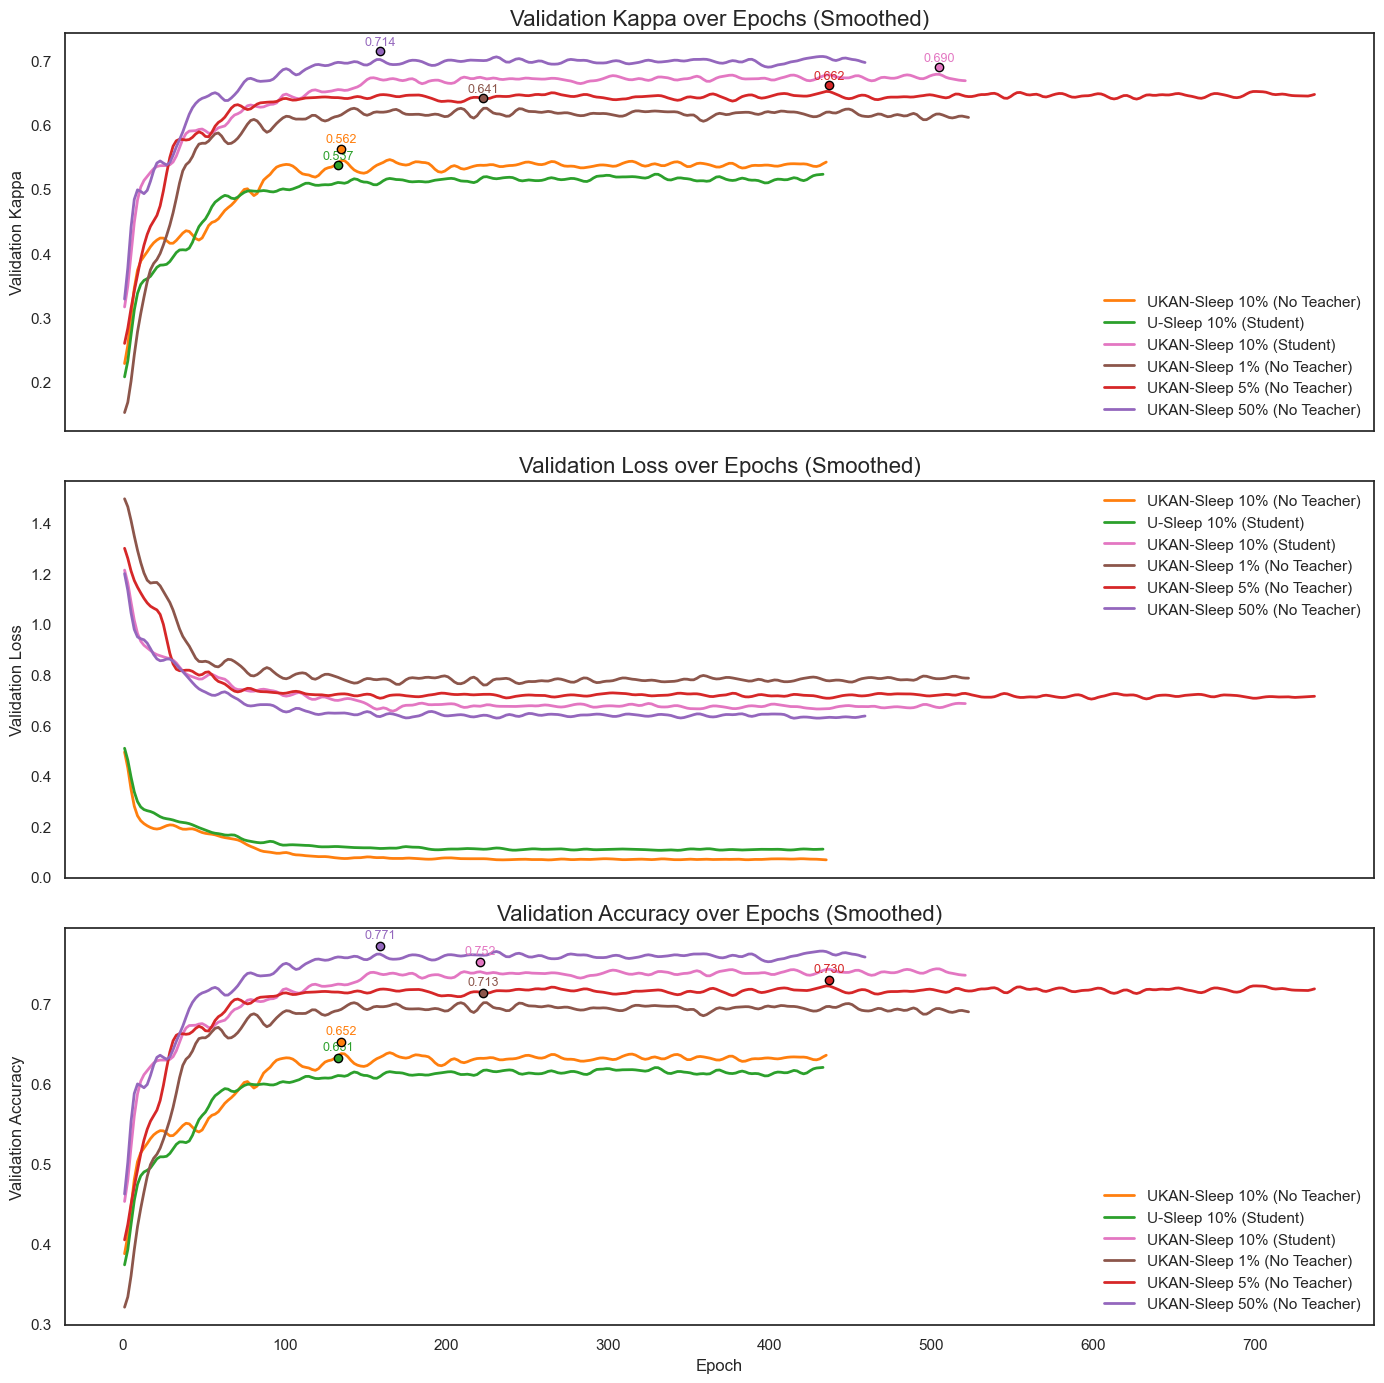

In [ ]:
import re
from pathlib import Path
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.ndimage import gaussian_filter1d # Import for smoothing

# --- Name Mapping ---
name_mapping: Dict[str, str] = {
    "original_usleep": "Original U-Sleep",
    "1%": "UKAN-Sleep 1% (No Teacher)",
    "5%": "UKAN-Sleep 5% (No Teacher)",
    "50%": "UKAN-Sleep 50% (No Teacher)",
    "gram_sleep_train": "U-Sleep 10% (Student)",
    "no_teach_gram_train": "UKAN-Sleep 10% (No Teacher)",
    "normal_usleep_student_train": "UKAN-Sleep 10% (Student)",
}

# --- NEW More Distinct Color Scheme ---
# Using colors inspired by Matplotlib's default palette for better separation
variant_colors: Dict[str, str] = {
    "original_usleep": "#1f77b4",  # Blue
    "no_teach_gram_train": "#ff7f0e",  # Orange
    "gram_sleep_train": "#2ca02c",  # Green
    "5%": "#d62728",  # Red
    "50%": "#9467bd",  # Purple
    "1%": "#8c564b",  # Brown
    "normal_usleep_student_train": "#e377c2",  # Pink
    # Add a fallback grey for any unexpected variants
    "default": "#7f7f7f",  # Grey
}


# --- SLURM file mapping ---
slurm_files: Dict[str, str] = {
    "no_teach_gram_train": "slurm-9885541.out",
    "gram_sleep_train": "slurm-9886024.out",
    "normal_usleep_student_train": "slurm-9894208.out",
    "1%": "slurm-9914253.out",
    "5%": "slurm-9915256.out",
    "50%": "slurm-9923281.out",
    # Add original_usleep if you have its data file
    # "original_usleep": "path/to/original_usleep_slurm.out",
}

# --- Smoothing Parameter ---
# Adjust sigma for more/less smoothing. Smaller values = less smoothing.
smoothing_sigma: float = 1.5


# --- Helper ---
def parse_slurm_file(
    filepath: Path,
) -> Tuple[List[int], List[float], List[float], List[float]]:
    epochs, losses, kappas, accs = [], [], [], []
    val_pattern = re.compile(
        r"Validation Epoch (\d+)/\d+, Loss: ([\d\.]+), Acc: ([\d\.]+), "
        r"Kappa: ([\d\.]+), F1: [\d\.]+"
    )
    try:
        with filepath.open("r", encoding="utf-8", errors="ignore") as f:
            for line in f:
                match = val_pattern.search(line)
                if match:
                    epochs.append(int(match.group(1)))
                    losses.append(float(match.group(2)))
                    accs.append(float(match.group(3)))
                    kappas.append(float(match.group(4)))
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
    return epochs, losses, kappas, accs


# --- Parse all files ---
data = {}

for variant, filename in slurm_files.items():
    path = Path(filename)
    # No need to check exists here, parse_slurm_file handles FileNotFoundError
    epochs, losses, kappas, accs = parse_slurm_file(path)
    if not epochs:
        print(f"Warning: No validation data parsed from {filename}.")
        continue
    # Ensure we have enough data points for smoothing if desired
    if len(epochs) < int(smoothing_sigma * 6): # Heuristic: need enough points for filter
        print(f"Warning: Not enough data points in {filename} for smoothing sigma={smoothing_sigma}. Skipping smoothing for this variant.")
        data[variant] = {
            "epochs": epochs,
            "losses": losses,
            "kappas": kappas,
            "accs": accs,
            "smoothed_losses": losses, # Use original if not enough data
            "smoothed_kappas": kappas,
            "smoothed_accs": accs,
        }
    else:
        data[variant] = {
            "epochs": epochs,
            "losses": losses,
            "kappas": kappas,
            "accs": accs,
            # Apply Gaussian smoothing
            "smoothed_losses": gaussian_filter1d(losses, sigma=smoothing_sigma),
            "smoothed_kappas": gaussian_filter1d(kappas, sigma=smoothing_sigma),
            "smoothed_accs": gaussian_filter1d(accs, sigma=smoothing_sigma),
        }


# --- Plot ---
# Set style to white (removes grid)
sns.set(style="white")
fig, axes = plt.subplots(3, 1, figsize=(14, 14), sharex=True)
fig.patch.set_facecolor("white") # Ensure figure background is white

# Explicitly set axes background to white as well
for ax in axes:
    ax.set_facecolor("white")

if not data:
    print("Error: No data loaded to plot.")
else:
    for variant, d in data.items():
        # Use .get with a default color key
        color = variant_colors.get(variant, variant_colors["default"])
        display_name = name_mapping.get(
            variant, variant
        )  # Get display name using mapping

        # Ensure data lists are not empty before plotting/finding max
        if not d["epochs"]:
            print(f"Skipping plotting for {variant} due to empty data.")
            continue

        # --- Plot SMOOTHED data ---
        # Validation Kappa
        axes[0].plot(
            d["epochs"],
            d["smoothed_kappas"], # Use smoothed data
            label=display_name,
            color=color,
            linewidth=2,
        )
        # Validation Loss
        axes[1].plot(
            d["epochs"],
            d["smoothed_losses"], # Use smoothed data
            label=display_name,
            color=color,
            linewidth=2,
        )
        # Validation Accuracy
        axes[2].plot(
            d["epochs"],
            d["smoothed_accs"], # Use smoothed data
            label=display_name,
            color=color,
            linewidth=2,
        )

        # --- Annotate based on ORIGINAL data peaks ---
        # Annotate best Kappa (check if original kappas list is not empty)
        if d["kappas"]:
            best_kappa_idx = int(np.argmax(d["kappas"])) # Find max in ORIGINAL
            best_kappa_epoch = d["epochs"][best_kappa_idx]
            best_kappa = d["kappas"][best_kappa_idx] # The actual max value
            axes[0].scatter(
                best_kappa_epoch,
                best_kappa, # Plot marker at original max point
                color=color,
                edgecolor="black",
                zorder=5,
            )
            axes[0].text(
                best_kappa_epoch,
                best_kappa + 0.01,
                f"{best_kappa:.3f}",
                color=color,
                ha="center",
                fontsize=9,
            )

        # Annotate best Accuracy (check if original accs list is not empty)
        if d["accs"]:
            best_acc_idx = int(np.argmax(d["accs"])) # Find max in ORIGINAL
            best_acc_epoch = d["epochs"][best_acc_idx]
            best_acc = d["accs"][best_acc_idx] # The actual max value
            axes[2].scatter(
                best_acc_epoch,
                best_acc, # Plot marker at original max point
                color=color,
                edgecolor="black",
                zorder=5,
            )
            axes[2].text(
                best_acc_epoch,
                best_acc + 0.01,
                f"{best_acc:.3f}",
                color=color,
                ha="center",
                fontsize=9,
            )

    # --- Styling ---
    for ax in axes:
        ax.grid(False) # Explicitly turn off grid for each axis
        # Optional: Add back spines if desired, as 'white' style removes some
        # ax.spines['top'].set_visible(True)
        # ax.spines['right'].set_visible(True)
        # ax.spines['bottom'].set_visible(True)
        # ax.spines['left'].set_visible(True)

    axes[0].set_ylabel("Validation Kappa", fontsize=12)
    axes[0].set_title("Validation Kappa over Epochs (Smoothed)", fontsize=16) # Updated title
    axes[0].legend()

    axes[1].set_ylabel("Validation Loss", fontsize=12)
    axes[1].set_title("Validation Loss over Epochs (Smoothed)", fontsize=16) # Updated title
    axes[1].legend()

    axes[2].set_ylabel("Validation Accuracy", fontsize=12)
    axes[2].set_xlabel("Epoch", fontsize=12)
    axes[2].set_title("Validation Accuracy over Epochs (Smoothed)", fontsize=16) # Updated title
    axes[2].legend()

    plt.tight_layout()
    plt.show()



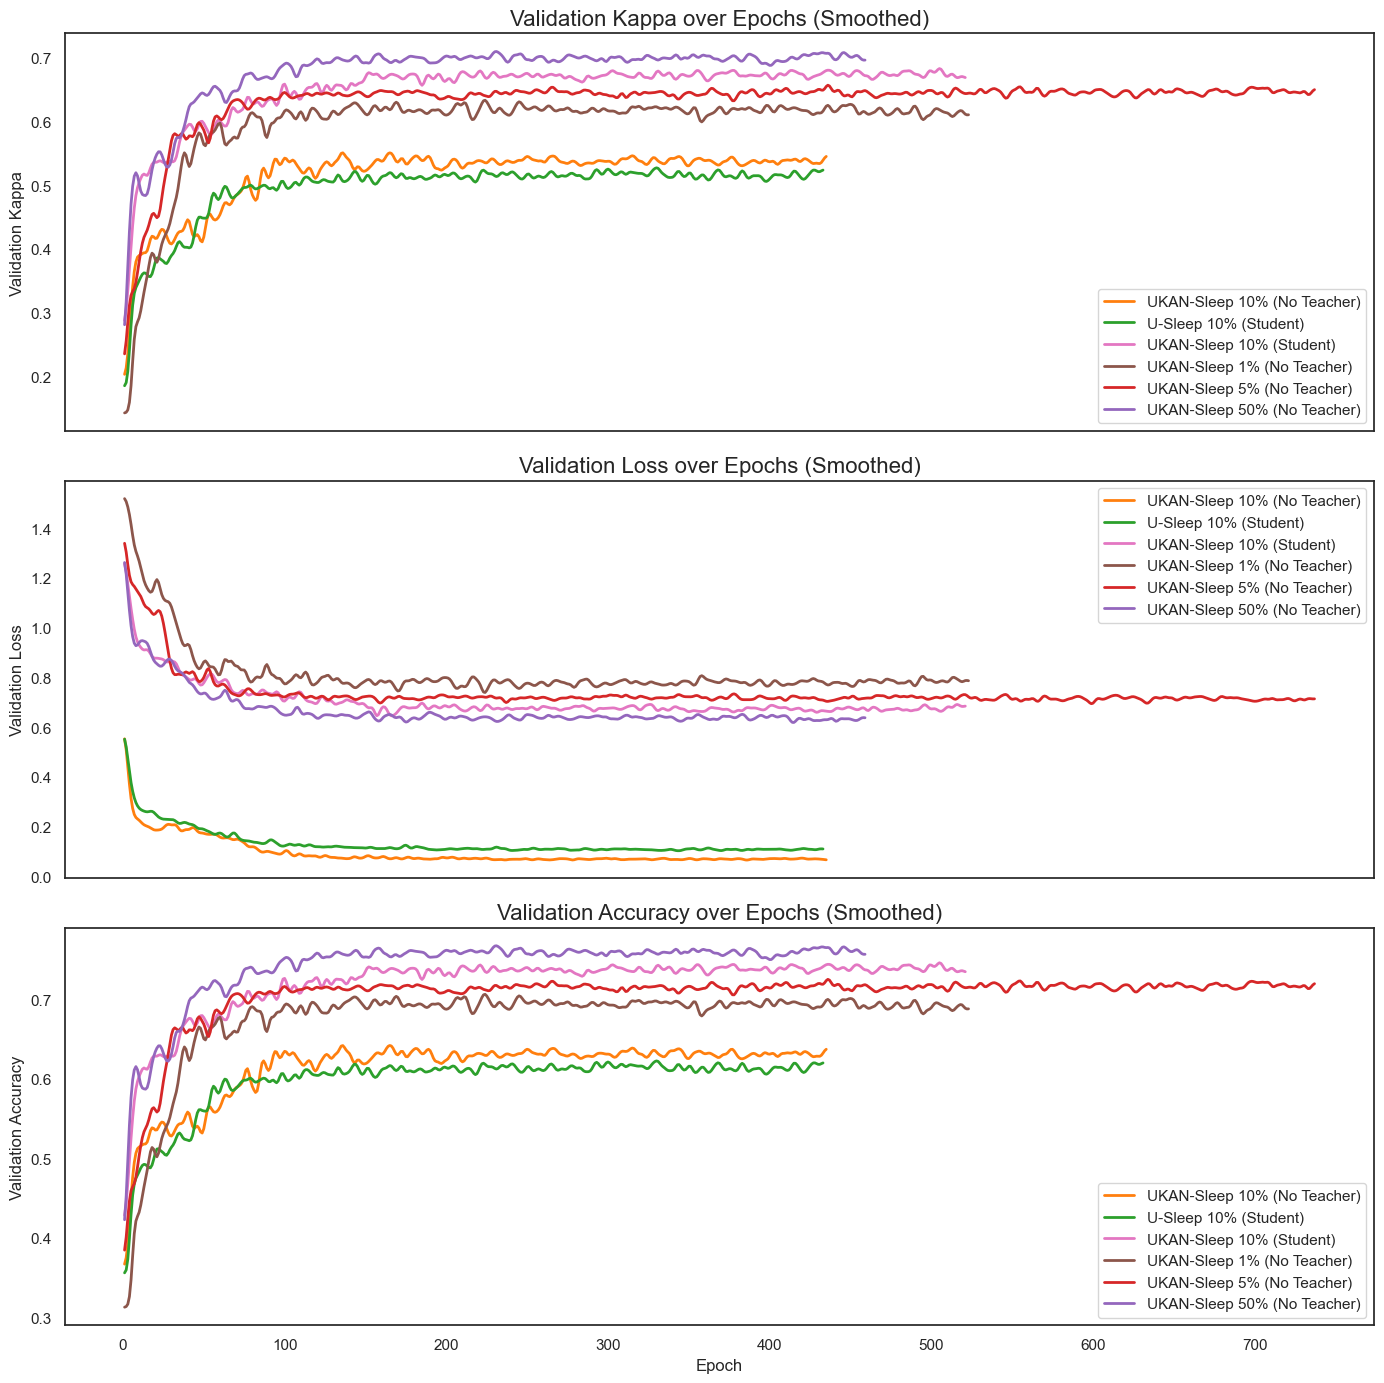

In [8]:
import re
from pathlib import Path
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d


# --- Name Mapping ---
name_mapping: Dict[str, str] = {
    "original_usleep": "Original U-Sleep",
    "1%": "UKAN-Sleep 1% (No Teacher)",
    "5%": "UKAN-Sleep 5% (No Teacher)",
    "50%": "UKAN-Sleep 50% (No Teacher)",
    "gram_sleep_train": "U-Sleep 10% (Student)",
    "no_teach_gram_train": "UKAN-Sleep 10% (No Teacher)",
    "normal_usleep_student_train": "UKAN-Sleep 10% (Student)",
}

# --- Color Scheme ---
variant_colors: Dict[str, str] = {
    "original_usleep": "#1f77b4",
    "no_teach_gram_train": "#ff7f0e",
    "gram_sleep_train": "#2ca02c",
    "5%": "#d62728",
    "50%": "#9467bd",
    "1%": "#8c564b",
    "normal_usleep_student_train": "#e377c2",
    "default": "#7f7f7f",
}

# --- SLURM file mapping ---
slurm_files: Dict[str, str] = {
    "no_teach_gram_train": "slurm-9885541.out",
    "gram_sleep_train": "slurm-9886024.out",
    "normal_usleep_student_train": "slurm-9894208.out",
    "1%": "slurm-9914253.out",
    "5%": "slurm-9915256.out",
    "50%": "slurm-9923281.out",
}

# --- Smoothing Parameter ---
smoothing_sigma: float = 1.5


def parse_slurm_file(filepath: Path) -> Tuple[List[int], List[float], List[float], List[float]]:
    """Parse validation epochs, losses, kappas, and accuracy from slurm file."""
    epochs, losses, kappas, accs = [], [], [], []
    val_pattern = re.compile(
        r"Validation Epoch (\d+)/\d+, Loss: ([\d\.]+), Acc: ([\d\.]+), "
        r"Kappa: ([\d\.]+), F1: [\d\.]+"
    )
    try:
        with filepath.open("r", encoding="utf-8", errors="ignore") as f:
            for line in f:
                match = val_pattern.search(line)
                if match:
                    epochs.append(int(match.group(1)))
                    losses.append(float(match.group(2)))
                    accs.append(float(match.group(3)))
                    kappas.append(float(match.group(4)))
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
    return epochs, losses, kappas, accs


def interpolate_metrics(
    epochs: List[int],
    losses: List[float],
    kappas: List[float],
    accs: List[float],
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Linearly interpolate losses, kappas, and accs for missing epochs.

    Returns:
        interpolated_epochs: np.ndarray of consecutive epochs from min to max
        interpolated_losses: np.ndarray of interpolated losses
        interpolated_kappas: np.ndarray of interpolated kappas
        interpolated_accs: np.ndarray of interpolated accs
    """
    if not epochs:
        raise ValueError("Empty epochs list for interpolation.")

    min_epoch = min(epochs)
    max_epoch = max(epochs)
    interpolated_epochs = np.arange(min_epoch, max_epoch + 1)

    # Convert to numpy arrays
    epochs_np = np.array(epochs)
    losses_np = np.array(losses)
    kappas_np = np.array(kappas)
    accs_np = np.array(accs)

    # Create interpolation functions
    kind = "linear"
    loss_interp = interp1d(epochs_np, losses_np, kind=kind, fill_value="extrapolate")
    kappa_interp = interp1d(epochs_np, kappas_np, kind=kind, fill_value="extrapolate")
    acc_interp = interp1d(epochs_np, accs_np, kind=kind, fill_value="extrapolate")

    interpolated_losses = loss_interp(interpolated_epochs)
    interpolated_kappas = kappa_interp(interpolated_epochs)
    interpolated_accs = acc_interp(interpolated_epochs)

    return interpolated_epochs, interpolated_losses, interpolated_kappas, interpolated_accs


# --- Parse all files and process data ---
data = {}

for variant, filename in slurm_files.items():
    path = Path(filename)
    epochs, losses, kappas, accs = parse_slurm_file(path)

    if not epochs:
        print(f"Warning: No validation data parsed from {filename}.")
        continue

    # Check epoch frequency (assumes epochs sorted ascending)
    sorted_epochs = sorted(epochs)
    diffs = np.diff(sorted_epochs)
    unique_diffs = np.unique(diffs)

    if len(unique_diffs) == 1 and unique_diffs[0] == 1:
        # Data recorded every epoch - no interpolation needed
        interp_epochs = np.array(epochs)
        interp_losses = np.array(losses)
        interp_kappas = np.array(kappas)
        interp_accs = np.array(accs)
    else:
        # Interpolate missing epochs
        interp_epochs, interp_losses, interp_kappas, interp_accs = interpolate_metrics(
            sorted_epochs, losses, kappas, accs
        )

    if len(interp_epochs) < int(smoothing_sigma * 6):
        print(f"Warning: Not enough data points in {filename} for smoothing sigma={smoothing_sigma}. Skipping smoothing for this variant.")
        smoothed_losses = interp_losses
        smoothed_kappas = interp_kappas
        smoothed_accs = interp_accs
    else:
        smoothed_losses = gaussian_filter1d(interp_losses, sigma=smoothing_sigma)
        smoothed_kappas = gaussian_filter1d(interp_kappas, sigma=smoothing_sigma)
        smoothed_accs = gaussian_filter1d(interp_accs, sigma=smoothing_sigma)

    data[variant] = {
        "epochs": interp_epochs,
        "losses": interp_losses,
        "kappas": interp_kappas,
        "accs": interp_accs,
        "smoothed_losses": smoothed_losses,
        "smoothed_kappas": smoothed_kappas,
        "smoothed_accs": smoothed_accs,
    }

# --- Plot ---
sns.set(style="white")
fig, axes = plt.subplots(3, 1, figsize=(14, 14), sharex=True)
fig.patch.set_facecolor("white")

for ax in axes:
    ax.set_facecolor("white")

if not data:
    print("Error: No data loaded to plot.")
else:
    for variant, d in data.items():
        color = variant_colors.get(variant, variant_colors["default"])
        display_name = name_mapping.get(variant, variant)

        if len(d["epochs"]) == 0:
            print(f"Skipping plotting for {variant} due to empty data.")
            continue

        axes[0].plot(d["epochs"], d["smoothed_kappas"], label=display_name, color=color, linewidth=2)
        axes[1].plot(d["epochs"], d["smoothed_losses"], label=display_name, color=color, linewidth=2)
        axes[2].plot(d["epochs"], d["smoothed_accs"], label=display_name, color=color, linewidth=2)

    for ax in axes:
        ax.grid(False)

    axes[0].set_ylabel("Validation Kappa", fontsize=12)
    axes[0].set_title("Validation Kappa over Epochs (Smoothed)", fontsize=16)
    axes[0].legend()

    axes[1].set_ylabel("Validation Loss", fontsize=12)
    axes[1].set_title("Validation Loss over Epochs (Smoothed)", fontsize=16)
    axes[1].legend()

    axes[2].set_ylabel("Validation Accuracy", fontsize=12)
    axes[2].set_xlabel("Epoch", fontsize=12)
    axes[2].set_title("Validation Accuracy over Epochs (Smoothed)", fontsize=16)
    axes[2].legend()

    plt.tight_layout()
    plt.show()
